# Parcial: Construcción e implementación de Random Forest 

En este parcial podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de  Random Forest. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este parcial se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [142]:
import warnings
warnings.filterwarnings('ignore')

In [143]:
#librerias
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [144]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False


In [145]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [146]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deberán aplicar técnicas de imputación adecuadas para completar la información de manera coherente. Posteriormente, se espera que realicen una exploración visual mediante gráficos que permitan comprender la distribución y las relaciones entre las variables principales.

Información general:

<class 'pandas.core.frame.DataFrame'>
Index: 10495 entries, 7 to 399976
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Price        10495 non-null  int64
 1   Year         10495 non-null  int64
 2   Mileage      10495 non-null  int64
 3   M_Camry      10495 non-null  bool 
 4   M_Camry4dr   10495 non-null  bool 
 5   M_CamryBase  10495 non-null  bool 
 6   M_CamryL     10495 non-null  bool 
 7   M_CamryLE    10495 non-null  bool 
 8   M_CamrySE    10495 non-null  bool 
 9   M_CamryXLE   10495 non-null  bool 
dtypes: bool(7), int64(3)
memory usage: 399.7 KB
Valores Nulos:
Price          0
Year           0
Mileage        0
M_Camry        0
M_Camry4dr     0
M_CamryBase    0
M_CamryL       0
M_CamryLE      0
M_CamrySE      0
M_CamryXLE     0
dtype: int64
Estadisticas:

              Price          Year        Mileage
count  10495.000000  10495.000000   10495.000000
mean   14538.403716   2013.553883

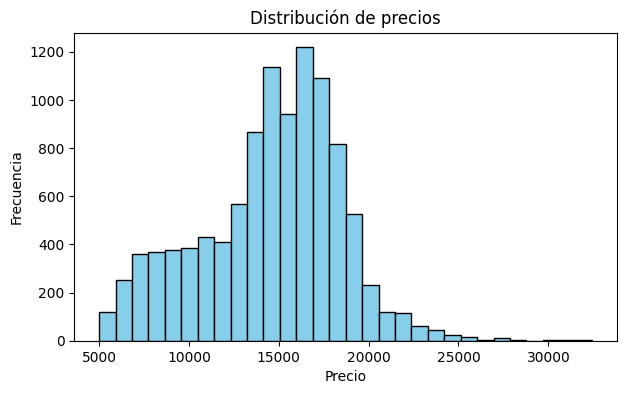

La mayoría de los automóviles tienen un promedio de precios entre medios y bajos.
pero hay algunos que alcanzan valores más altos, lo que los hace significativamente más costosos que el promedio.



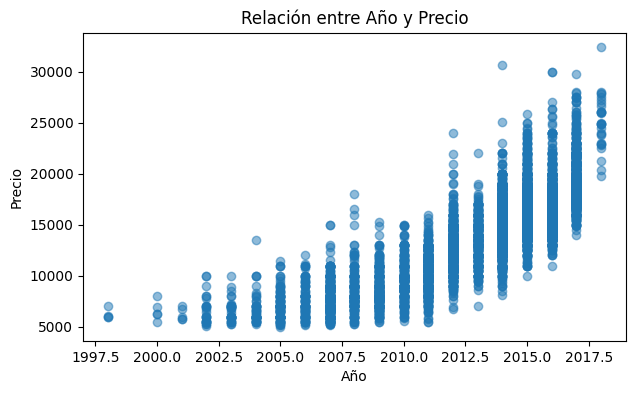

Los automóviles más nuevos tienden a tener precios más altos.
y entre más antiguo sea el automóvil, el valor es cada vez más bajo.



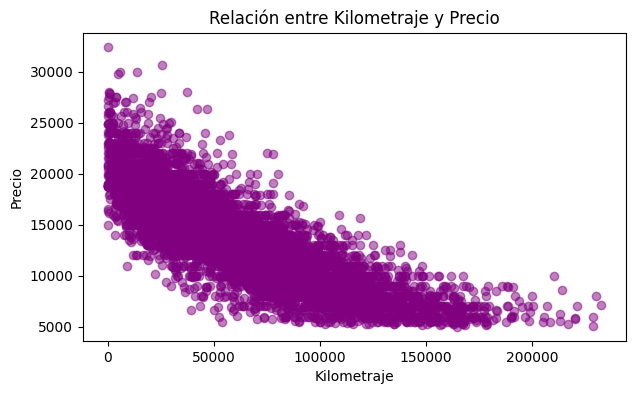

Los automóviles con mayor kilometraje suelen tener precios más bajos, debido a que están más desgastados.
Por lo tanto, entre menor kilometraje tenga el automóvil, mayor será su precio.



In [147]:
# celda 0 - exploracion y analisis de datos

data.head()
print("Información general:\n")
data.info()

print("Valores Nulos:")
print(data.isnull().sum())

print("Estadisticas:\n")
print(data.describe())

plt.figure(figsize=(7,4))
plt.hist(data['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

print("La mayoría de los automóviles tienen un promedio de precios entre medios y bajos.")
print("pero hay algunos que alcanzan valores más altos, lo que los hace significativamente más costosos que el promedio.\n")

plt.figure(figsize=(7,4))
plt.scatter(data['Year'], data['Price'],alpha=0.5)
plt.title('Relación entre Año y Precio')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.show()

print("Los automóviles más nuevos tienden a tener precios más altos.")
print("y entre más antiguo sea el automóvil, el valor es cada vez más bajo.\n")

plt.figure(figsize=(7,4))
plt.scatter(data['Mileage'], data['Price'], alpha=0.5, color='purple')
plt.title('Relación entre Kilometraje y Precio')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.show()

print("Los automóviles con mayor kilometraje suelen tener precios más bajos, debido a que están más desgastados.")
print("Por lo tanto, entre menor kilometraje tenga el automóvil, mayor será su precio.\n")


### Punto 1 - Random forest con librería

En la celda 1, usando la librería sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempeño del modelo.

In [148]:
# Celda 1

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Desempeño del modelo RandomForest:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f} %")

Desempeño del modelo RandomForest:
Mean Squared Error: 3116678.92
R^2 Score: 0.796
Mean Absolute Error (MAE): 1314.42
Mean Absolute Percentage Error (MAPE): 9.55 %


### Punto 2 - Calibración de parámetros Random forest

En la celda 2, calibren los parámetros max_depth, max_features y n_estimators del modelo de Random Forest para regresion, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [149]:
# Celda 2

param_distributions = {
    'n_estimators': [100, 200, 300, 500, 800, 1000],
    'max_depth': [10, 20, 30, 40, 50, None],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}
rf = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)

print("\nMejores Hiperparámetros:")
print(rf_random.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits

Mejores Hiperparámetros:
{'n_estimators': 200, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}


In [150]:
#Encontrar los mejores hiperparametros: 

best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test)

#Entrenar el modelo con los mejores hiperparámetros encontrados:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"\nDesempeño del modelo Random Forest calibrado:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f} %")


Desempeño del modelo Random Forest calibrado:
Mean Squared Error (MSE): 2406397.54
R² Score: 0.843
Mean Absolute Error (MAE): 1139.77
Mean Absolute Percentage Error (MAPE): 8.32 %


Importancia de las variables predictoras:
       Feature  Importance
0         Year    0.449964
1      Mileage    0.425279
3   M_Camry4dr    0.064479
7    M_CamrySE    0.021486
8   M_CamryXLE    0.019124
6    M_CamryLE    0.007940
2      M_Camry    0.006567
5     M_CamryL    0.003119
4  M_CamryBase    0.002042


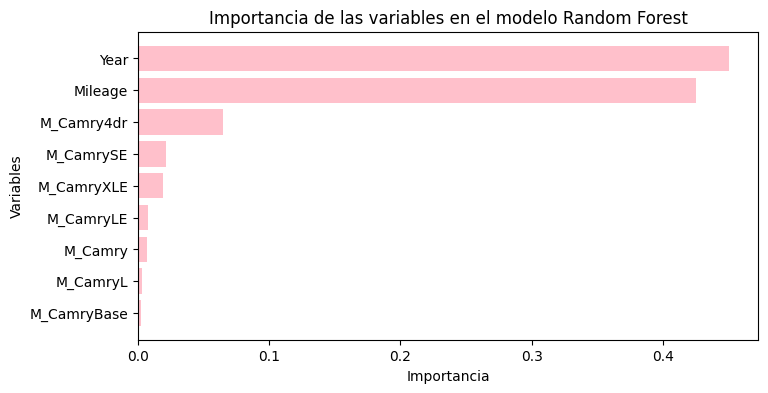

En la gráfica se puede evidenciar que las variables con mayor importancia son:
El año de fabricación y el kilometraje.


In [155]:
#Importancia de los predictores

importances = best_rf.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Importancia de las variables predictoras:")
print(feature_importance)

plt.figure(figsize=(8,4))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='pink')
plt.gca().invert_yaxis()
plt.title('Importancia de las variables en el modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.show()

print("En la gráfica se puede evidenciar que las variables con mayor importancia son:")
print("El año de fabricación y el kilometraje.")

### Punto 3 - análisis de resultados, gracias y conclusiones
En la celda 3

In [154]:
#celda 3

print("Análisis de resultados del modelo Random Forest calibrado\n")

print("\nMejores Hiperparámetros encontrados:")
print(rf_random.best_params_)

print(f"\nDesempeño del modelo calibrado:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f} %\n")

print("Importancia de las variables predictoras:")
print(feature_importance)

print("\nConclusiones:")
print("1. Los automóviles más nuevos y con menor kilometraje tienden a tener precios más altos, mientras que los vehículos más antiguos o con mayor uso presentan precios más bajos.")
print("2. El modelo random forest predice y determina el precio de los automóviles en relación con distintas variables.")
print("3. Una vez se encuentran los hiperparametros, se puede entrenar el modelo en base a ellos y así, mejorar el desempeño y disminuir el porcentaje de errores.")


Análisis de resultados del modelo Random Forest calibrado


Mejores Hiperparámetros encontrados:
{'n_estimators': 200, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}

Desempeño del modelo calibrado:
Mean Squared Error (MSE): 2406397.54
R² Score: 0.843
Mean Absolute Error (MAE): 1139.77
Mean Absolute Percentage Error (MAPE): 8.32 %

Importancia de las variables predictoras:
       Feature  Importance
0         Year    0.449964
1      Mileage    0.425279
3   M_Camry4dr    0.064479
7    M_CamrySE    0.021486
8   M_CamryXLE    0.019124
6    M_CamryLE    0.007940
2      M_Camry    0.006567
5     M_CamryL    0.003119
4  M_CamryBase    0.002042

Conclusiones:
1. Los automóviles más nuevos y con menor kilometraje tienden a tener precios más altos, mientras que los vehículos más antiguos o con mayor uso presentan precios más bajos.
2. El modelo random forest predice y determina el precio de los automóviles en relación con distintas variables.
3. Una vez

NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.